In [1]:
import pandas as pd

In [3]:
import seaborn as sns
sns.set_theme()

In [25]:
import matplotlib

In [26]:
from matplotlib import pyplot as plt

In [4]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
raw_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
raw_data.shape

(344, 7)

In [6]:
raw_data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
raw_data['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
raw_data['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
raw_data['bill_length_mm'].unique()
raw_data[raw_data['bill_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
clear_data = raw_data.copy()

In [11]:
clear_data.drop(clear_data[clear_data['bill_length_mm'].isnull()].index, inplace=True)
clear_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [12]:
clear_data['bill_depth_mm'].isnull().index[0]

0

In [13]:
clear_data['flipper_length_mm'].isnull().index[0]

0

In [14]:
clear_data['body_mass_g'].isnull().index[0]

0

In [15]:
clear_data['sex'].isnull().index[0]

0

In [16]:
clear_data.groupby('species').size()

species
Adelie       151
Chinstrap     68
Gentoo       123
dtype: int64

In [17]:
clear_data.groupby('island').size()

island
Biscoe       167
Dream        124
Torgersen     51
dtype: int64

In [18]:
clear_data[clear_data['island']=='Biscoe'].groupby('species').size()

species
Adelie     44
Gentoo    123
dtype: int64

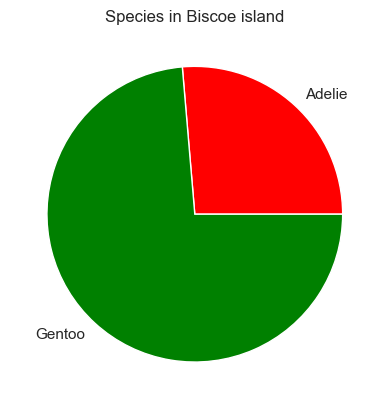

In [45]:
plt.pie(clear_data[clear_data['island']=='Biscoe'].groupby('species').size(),labels=clear_data[clear_data['island']=='Biscoe']['species'].unique(),colors=['red','green'])
plt.title('Species in Biscoe island')
plt.show()

In [50]:
clear_data[clear_data['island']=='Dream'].groupby('species').size()

species
Adelie       56
Chinstrap    68
dtype: int64

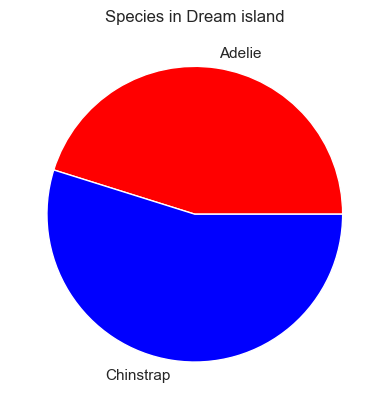

In [46]:
plt.pie(clear_data[clear_data['island']=='Dream'].groupby('species').size(),labels=clear_data[clear_data['island']=='Dream']['species'].unique(),colors=['red','blue'])
plt.title('Species in Dream island')
plt.show()

In [51]:
clear_data[clear_data['island']=='Torgersen'].groupby('species').size()

species
Adelie    51
dtype: int64

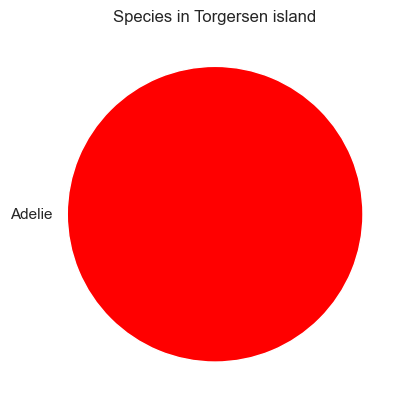

In [48]:
plt.pie(clear_data[clear_data['island']=='Torgersen'].groupby('species').size(),labels=clear_data[clear_data['island']=='Torgersen']['species'].unique(),colors=['red'])
plt.title('Species in Torgersen island')
plt.show()

In [56]:
clear_data.groupby('sex')['bill_length_mm'].mean()

sex
FEMALE    42.096970
MALE      45.854762
Name: bill_length_mm, dtype: float64

In [57]:
clear_data.groupby('sex')['bill_depth_mm'].mean()

sex
FEMALE    16.425455
MALE      17.891071
Name: bill_depth_mm, dtype: float64

In [58]:
clear_data.groupby('sex')['flipper_length_mm'].mean()

sex
FEMALE    197.363636
MALE      204.505952
Name: flipper_length_mm, dtype: float64

In [59]:
clear_data.groupby('sex')['body_mass_g'].mean()

sex
FEMALE    3862.272727
MALE      4545.684524
Name: body_mass_g, dtype: float64

In [68]:
clear_data[clear_data['species']=='Adelie']['body_mass_g'].mean()

3700.662251655629

In [69]:
clear_data[clear_data['species']=='Chinstrap']['body_mass_g'].mean()

3733.0882352941176

In [70]:
clear_data[clear_data['species']=='Gentoo']['body_mass_g'].mean()

5076.016260162602

<Axes: xlabel='body_mass_g', ylabel='sex'>

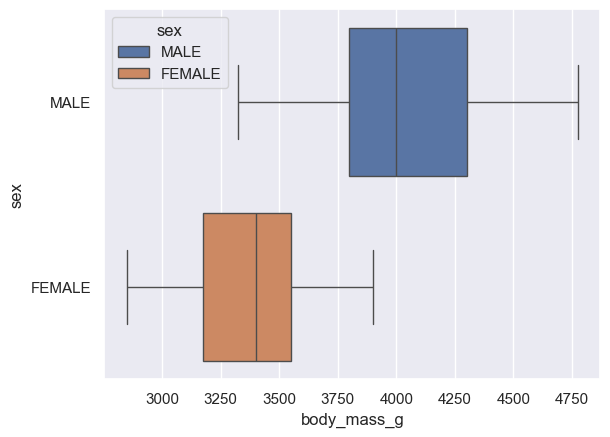

In [50]:
sns.boxplot(data=clear_data[clear_data['species']=='Adelie'], x='body_mass_g',y='sex',hue='sex')

<Axes: xlabel='body_mass_g', ylabel='species'>

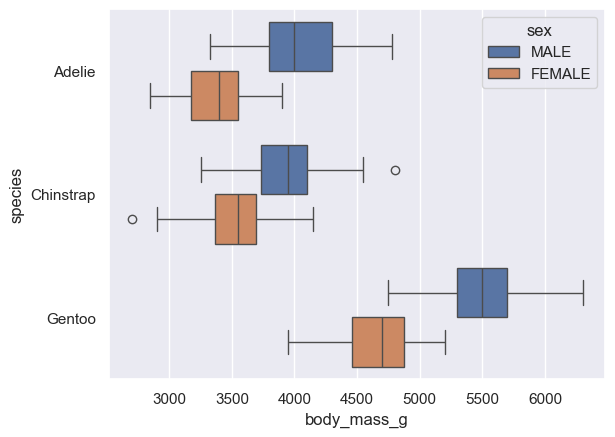

In [51]:
sns.boxplot(data=clear_data, x='body_mass_g',y='species',hue='sex')